# Project Development


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [6]:
data=pd.read_csv("saved_model/dataset/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


#### **1.Handle missing values**

In [7]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
# remove duplicated values
data.duplicated().sum()

0

In [11]:
# if duplicate values are present
data.drop_duplicates(inplace=True)
# data=data.drop_duplicates()

In [13]:
#remove unwanted columns
data.drop(labels=['RowNumber','CustomerId','Surname'],axis=1,inplace=True) #axis=1 means column
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [16]:
categorical_cols=data.select_dtypes(include= 'object').columns
numerical_cols=data.select_dtypes(exclude= 'object').columns

print("categorical columns: ",categorical_cols)
print("numerical columns: ",numerical_cols)

categorical columns:  Index(['Geography', 'Gender'], dtype='object')
numerical columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
data.Gender.unique()


array(['Female', 'Male'], dtype=object)

In [19]:
data.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [20]:
data.Gender.value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

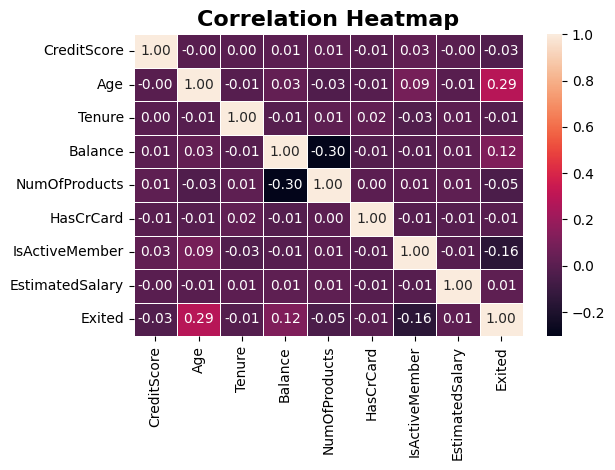

In [23]:
# correlation ==> Heatmap
plt.Figure(figsize=(20,20))
corr_matrix=data[numerical_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
)
plt.title("Correlation Heatmap",fontsize=16,fontweight="bold")
plt.tight_layout()
plt.show()

In [24]:
# dependent and independent features
X=data.drop('Exited',axis=1)
y=data['Exited']

In [25]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [26]:
categorical_cols=X.select_dtypes(include= 'object').columns
numerical_cols=X.select_dtypes(exclude= 'object').columns

print("categorical columns: ",categorical_cols)
print("numerical columns: ",numerical_cols)

categorical columns:  Index(['Geography', 'Gender'], dtype='object')
numerical columns:  Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')


In [27]:
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer 
from sklearn.pipeline import Pipeline

In [28]:
gender_cat=['Female','Male']
geo_cat=['France','Spain','Germany']

In [29]:
num_pipeline=Pipeline(steps=[('scaler',StandardScaler())])

cat_pipeline=Pipeline(steps=[('OrdinalEncoder',OrdinalEncoder(
    categories=[geo_cat,gender_cat]))])

preprocessor=ColumnTransformer(
    [("num_pipeline",num_pipeline,numerical_cols),
     ("cat_pipeline",cat_pipeline,categorical_cols)]
)

In [30]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [32]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.fit_transform(X_test),columns=preprocessor.get_feature_names_out())

In [33]:
X_train.head()

,num_pipeline__CreditScore,num_pipeline__Age,num_pipeline__Tenure,num_pipeline__Balance,num_pipeline__NumOfProducts,num_pipeline__HasCrCard,num_pipeline__IsActiveMember,num_pipeline__EstimatedSalary,cat_pipeline__Geography,cat_pipeline__Gender
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,0.0,1.0
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,2.0,1.0
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,1.0,1.0
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,0.0,0.0
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,0.0,1.0
